In [3]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Read data
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/melb_data.csv')

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## View data distribution

Here's a visualization that shows the distribution of house prices as a whole.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


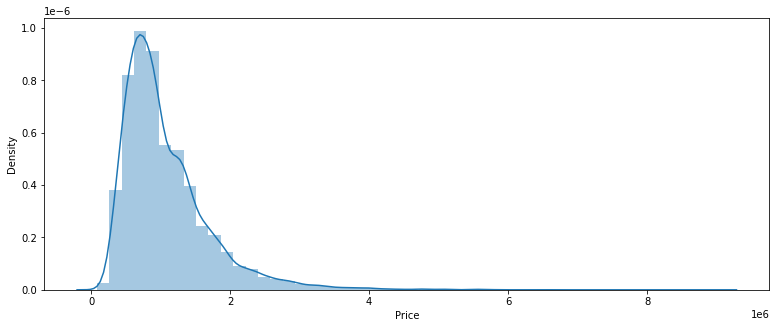

In [ ]:
# Seaborn
plt.figure(figsize=(13,5))
sns.distplot(df['Price'])

### What if we wanted to remove the line and make the y-axis a frequency?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


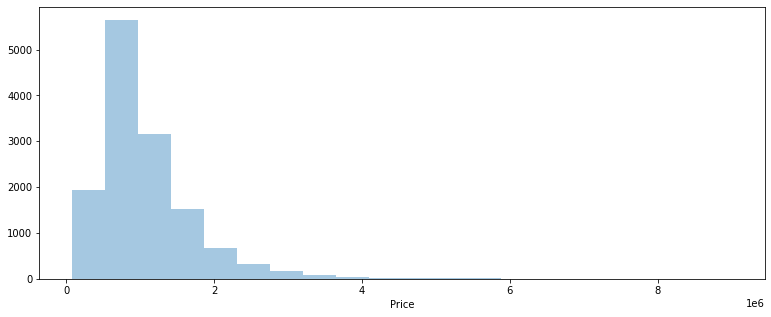

In [ ]:
plt.figure(figsize=(13,5))
sns.distplot(df['Price'], bins=20, kde=False)

### Let's make it more Aesthetic.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


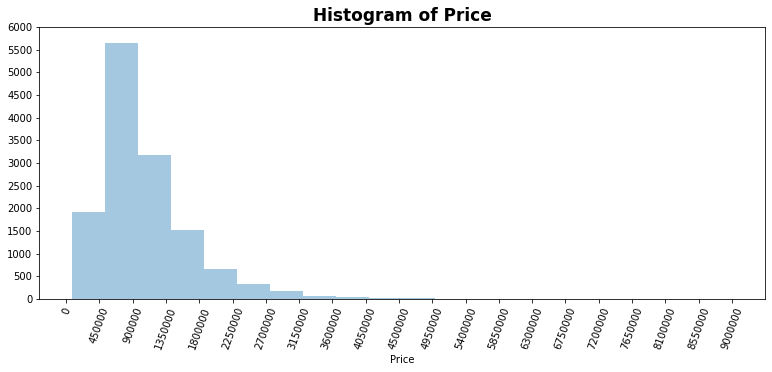

In [ ]:
# Create a limit for each bin
x_tick = np.linspace(0,9000000,21)
y_tick = np.arange(0,6001,500)

# Plot
plt.figure(figsize=(13,5))

ax = sns.distplot(df['Price'], bins=20, kde=False)
ax.set_xticks(x_tick)
ax.set_yticks(y_tick)
ax.ticklabel_format(style='plain') # Get rid of 1e6 in plot

plt.title('Histogram of Price', fontsize=17, fontweight='bold')
plt.xticks(rotation=70)
plt.show()

We can see that the highest housing prices are in the range of 450000-900000, and this data is positively skewed distribution.

### We can also use boxplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


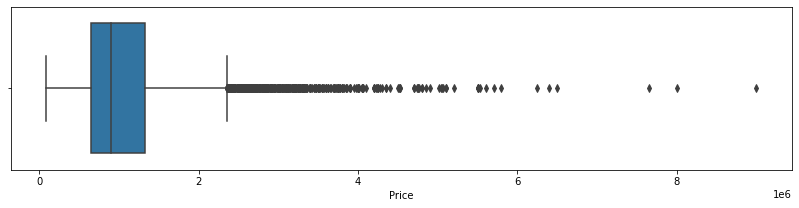

In [ ]:
plt.figure(figsize=(14,3))
sns.boxplot(df['Price'])

In [ ]:
# Check the value of Q1, Q2, and Q3
df.describe()[['Price']].tail()

,Price
min,85000.0
25%,650000.0
50%,903000.0
75%,1330000.0
max,9000000.0


We can see the exact value of Q1 (25%) = 650000, Q2/Median (50%) = 903000, and Q3 (75%) = 1330000.

## Visualization of average house prices by Region name

In [ ]:
# groupby region and sort price value from the highest
price_sort = df.groupby(by='Regionname', as_index=False).mean()[['Regionname','Price']].sort_values(by='Price',ascending=False)
price_sort

,Regionname,Price
5,Southern Metropolitan,1.372963e+06
0,Eastern Metropolitan,1.104080e+06
4,South-Eastern Metropolitan,9.229438e+05
2,Northern Metropolitan,8.981711e+05
6,Western Metropolitan,8.664205e+05
1,Eastern Victoria,6.999808e+05
3,Northern Victoria,5.948293e+05
7,Western Victoria,3.975234e+05


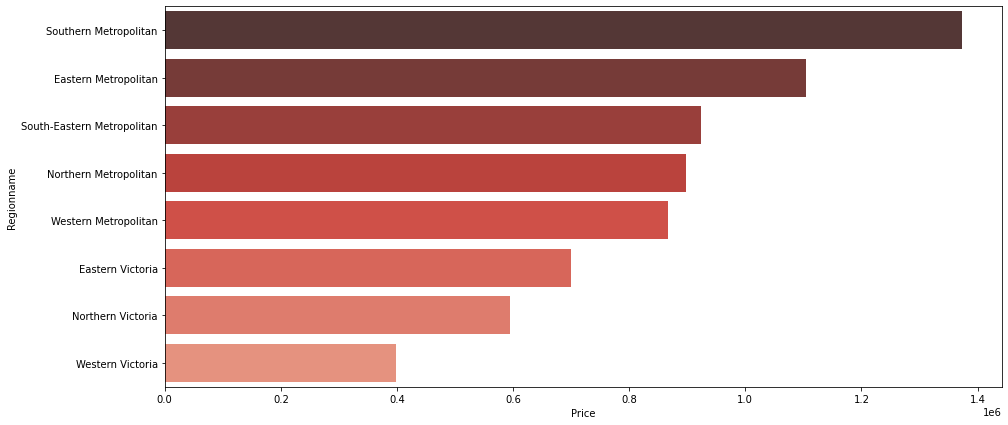

In [ ]:
# Visualization barplot
fig, ax = plt.subplots(figsize=(15,7))

sns.barplot(x = 'Price',y='Regionname',data=price_sort,ax=ax,
            palette=reversed(sns.color_palette("Reds_d", n_colors=8, desat=1))
            )

From the data above, we can see that the highest average price is in Southern Metropolitan Region, and the lowest average price is in Western Victoria Region. And I use continuous color (gradient) in the plot because the 'Regionname' data is categorical.

## Visualization of the number of houses for each type of house

Text(0, 0.5, 'Houses count')

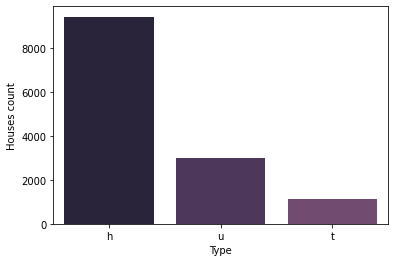

In [ ]:
sns.countplot(data=df, x='Type', palette=reversed(sns.color_palette("ch:s=-.2,r=.6", n_colors=8, desat=1)))
plt.ylabel('Houses count')

From the data above, we can see that the highest number of houses is house type 'h' and the least is house type 't'.

## Visualization depicting the relationship between the variables 'Room', 'Price', 'Distance', 'BuildingArea', and 'YearBuilt'

In [7]:
df_corr = df[['Rooms', 'Price', 'Distance', 'BuildingArea', 'YearBuilt']].corr('spearman')
df_corr

,Rooms,Price,Distance,BuildingArea,YearBuilt
Rooms,1.000000,0.539886,0.351416,0.775193,-0.072058
Price,0.539886,1.000000,-0.129990,0.631425,-0.368080
Distance,0.351416,-0.129990,1.000000,0.287116,0.228634
BuildingArea,0.775193,0.631425,0.287116,1.000000,0.003002
YearBuilt,-0.072058,-0.368080,0.228634,0.003002,1.000000


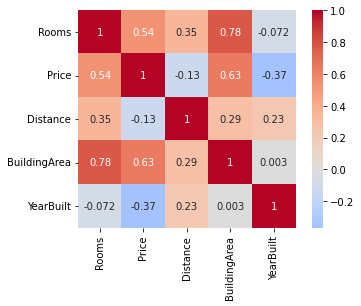

In [10]:
# Using heatmap
sns.heatmap(df_corr, annot=True, center=0, square=True, cmap='coolwarm')

Heatmap makes it easier for us to see the correlation between variables. If we look at the color scale on the right, the redder the correlation is getting stronger and if the color is getting paler then the correlation is getting weaker. For example, the strongest correlation is in the variables 'Rooms' and 'BuildingArea'. This makes sense because the wider the building area, the more rooms there will be.

## Visualization showing the correlation between 'BuildingArea' and 'Price'

In [11]:
# Correlation value
df.corr('spearman')['Price']['BuildingArea']

0.6314247475827348

In [12]:
# Removing (temporarily) a house with a Building Area of more than 2000 m2 because it is considered an outlier
outlier = df[df['BuildingArea']>2000].index

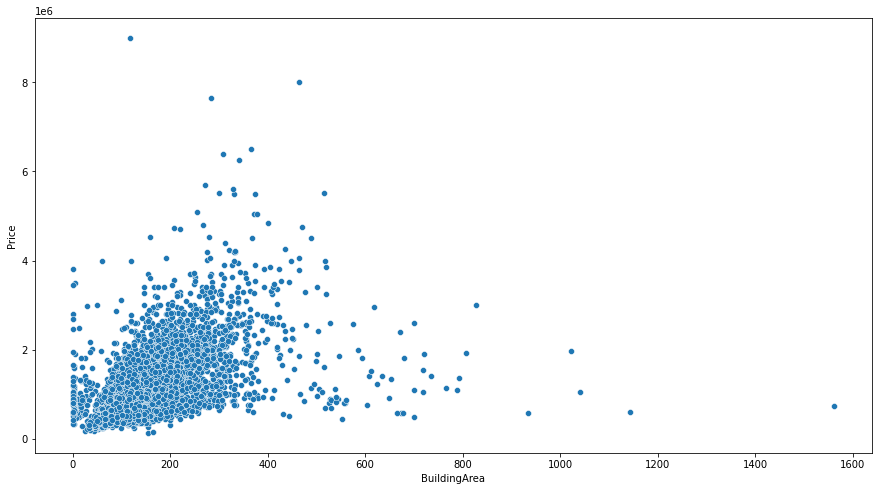

In [22]:
# Visualization using scatter plot
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(x='BuildingArea', y='Price', data=df.drop(index=outlier))

We can see that the plot has a positive relationship, namely the wider the BuildingArea, the higher the Price.

### What if we want to visualize correlation between 'BuildingArea' and 'Price' but with house type? 

We can just add 'hue' to the plot.

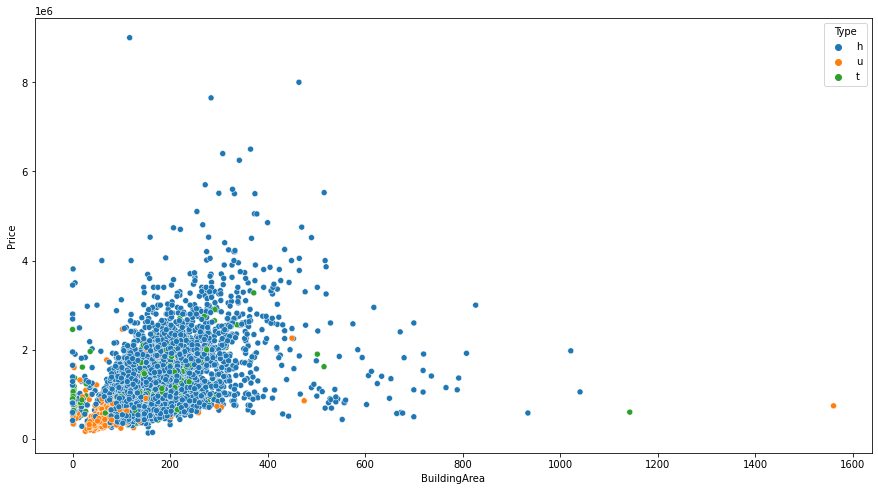

In [23]:
fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(x='BuildingArea', y='Price', data=df.drop(index=outlier), hue='Type')

#Type
#h - house, cottage, villa, semi terrace
#u - unit, duplex
#t - townhouse

Now the plot has different colors based on the house Type.

## A visualization showing the change in the number of homes for sale from Jan 2016 - Dec 2017

In [25]:
# Change column 'Date' from object to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0       2016-03-12
1       2016-04-02
2       2017-04-03
3       2017-04-03
4       2016-04-06
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]

If we want to visualize time series data, we are advised to use lineplot.

Text(0.5, 1.0, 'Changes of Home sales from Jan 2016 - Dec 2017')

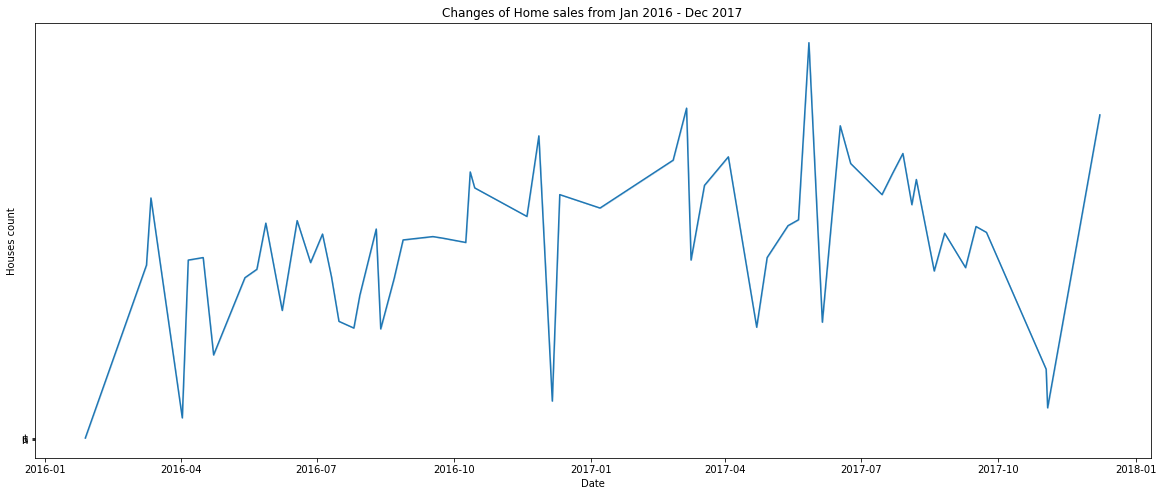

In [35]:
plt.figure(figsize=(20,8))

sns.lineplot(data=df, x='Date', y='Type', estimator=len)
plt.gca().invert_yaxis()

plt.ylabel('Houses count')
plt.title('Changes of Home sales from Jan 2016 - Dec 2017')

In [36]:
# If we want to take only the month and year:
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M').apply(lambda x:str(x))
df['Month']

0        2016-03
1        2016-04
2        2017-04
3        2017-04
4        2016-04
          ...   
13575    2017-08
13576    2017-08
13577    2017-08
13578    2017-08
13579    2017-08
Name: Month, Length: 13580, dtype: object

In [37]:
# Number of houses sold per month
df_monthly_price = df.groupby('Month', as_index=False).count()[['Month','Price']].rename(columns={'Price':'Number of house'})
df_monthly_price

,Month,Number of house
0,2016-01,2
1,2016-03,496
2,2016-04,558
3,2016-05,654
4,2016-06,626
5,2016-07,885
6,2016-08,813
7,2016-09,482
8,2016-10,854
9,2016-11,628


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text major ticklabel objects>)

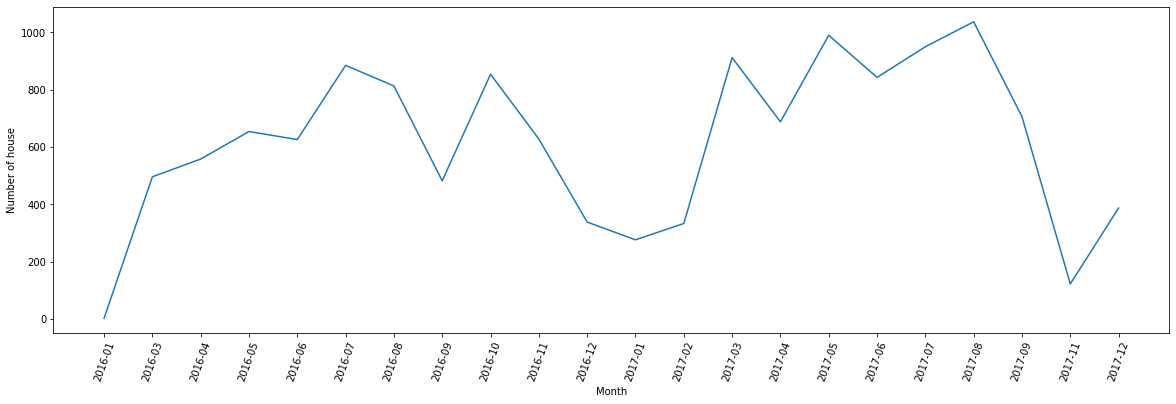

In [38]:
# Lineplot
plt.figure(figsize=(20,6))
sns.lineplot(data=df_monthly_price, x='Month', y='Number of house')
plt.xticks(rotation=70)

We can see that the number of houses sold per month fluctuates, increasing sharply in 2017-02 to 2017-03 and sharply decreased in 2017-08 to 2017-11.

## A visualization that shows a comparison of the 'Price' distribution based on the 'Type' of house

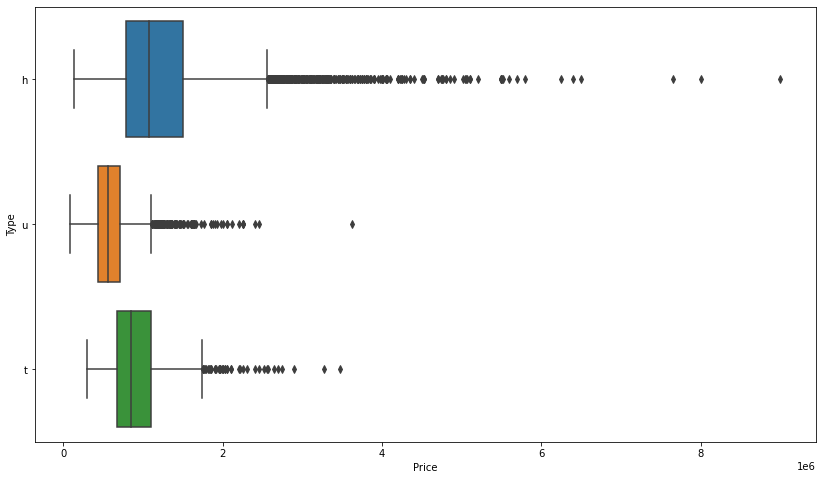

In [42]:
plt.figure(figsize=(14,8))
sns.boxplot(x=df['Price'], y='Type', data=df)

We can see that the widest distribution of data is in Type h, and the narrowest is in Type u. The house with the most expensive median value is also in Type h.

### What if we want to see the price of house Type 'h' which is said to be an outlier?

In [43]:
df_type_h = df[df['Type']=='h'][['Price']]
df_type_h

,Price
0,1480000.0
1,1035000.0
2,1465000.0
3,850000.0
4,1600000.0
...,...
13575,1245000.0
13576,1031000.0
13577,1170000.0
13578,2500000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


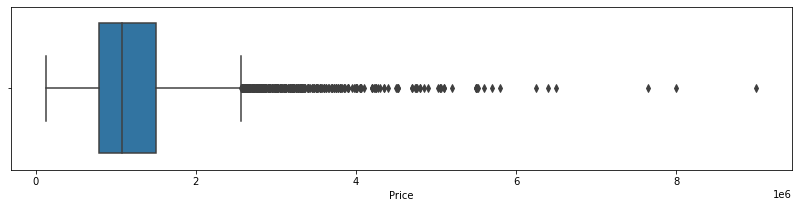

In [46]:
plt.figure(figsize=(14,3))
sns.boxplot(df_type_h['Price'])

In [47]:
# Find Q1, Q3 value
q1 = df_type_h['Price'].quantile(0.25)
q3 = df_type_h['Price'].quantile(0.75)

IQR = q3 - q1
IQR

upper = q3 + 1.5*IQR
lower = q1 - 1.5*IQR

print(f'A house of type h can be said to be an outlier if its price > {upper} or < {lower}')

A house of type h can be said to be an outlier if its price > 2562000.0 or < -270000.0
